In [1]:
#This is my first notebook in which I'm going to predict the species of iris
#This will be done using classification algorithms

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
iris = pd.read_csv("Iris.csv")

In [21]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [23]:
#Remove the unwanted column, ID
iris.drop('Id', axis=1, inplace=True)

In [24]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Some explanatory Data Analysis with Iris

### Plotting graph between sepal length vs sepal width

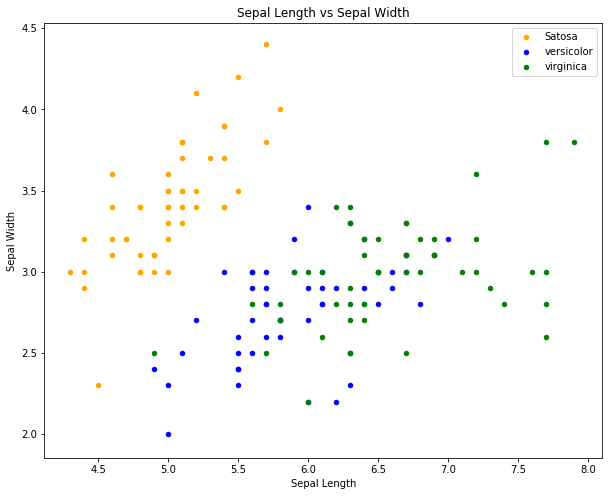

In [25]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', 
y='SepalWidthCm', color='orange', label = 'Satosa')

fig = iris[iris.Species=='Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', 
y='SepalWidthCm', color='blue', label = 'versicolor', ax=fig)

fig = iris[iris.Species=='Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', 
y='SepalWidthCm', color='green', label = 'virginica', ax=fig)

fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length vs Sepal Width")

fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

#### The above relation shows the relationship between sepal length and sepal width. Now we will check relation with petal length and petal width

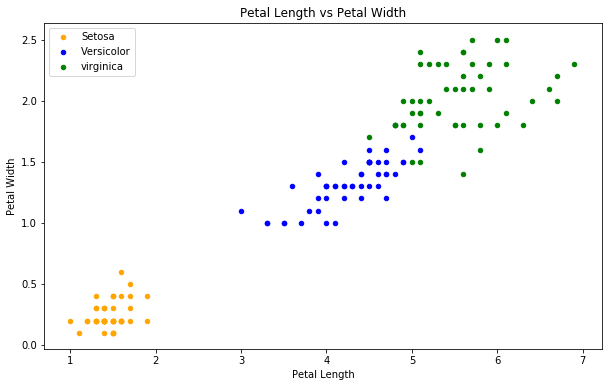

In [26]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm', 
y='PetalWidthCm', color='orange', label='Setosa')

iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',
y='PetalWidthCm', color='blue', label='Versicolor', ax=fig)

iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',
y='PetalWidthCm', color='green', label='virginica', ax=fig)

fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Length vs Petal Width")
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.show()


### Distribution of lenghts and widths

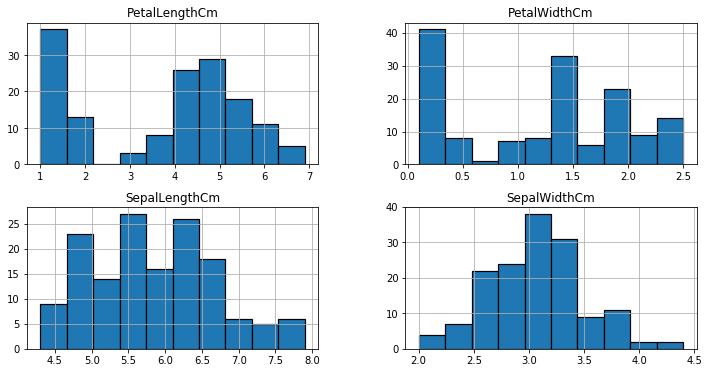

In [27]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()


### Now the given problem is a classification problem.. Thus we will be using the classification algorithms to build a model

In [28]:
# Import all necessary packages to use various classification algorithms
from sklearn.linear_model import LogisticRegression 
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier


C:\Users\Pranshu Die\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [36]:
iris.shape

(150, 5)

In [37]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [40]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


When we train any algorithm, the number of features and their co-relation plays an important role to determine the accuracy. Training the algorithm with all the features wil reduce the accuracy. Hence, we should select the features carefully.

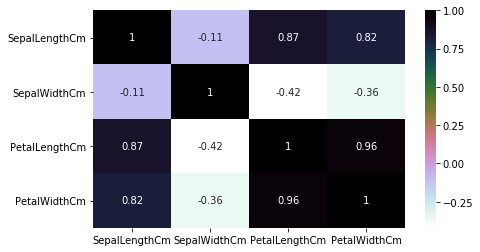

In [38]:
plt.figure(figsize=(7,4))
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r')
plt.show()

## Steps To Be followed When Applying an Algorithm
Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.
Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
Then pass the training dataset to the algorithm to train it. We use the .fit() method
Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.
We then check the accuracy by passing the predicted outcome and the actual output to the model.

### Splitting the data into training and testing data

In [47]:
train, test = train_test_split(iris, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 5)
(38, 5)


In [48]:
train_X = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                 'PetalWidthCm']]
train_y = train.Species

test_X = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                 'PetalWidthCm']]
test_y = test.Species 

In [49]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
14,5.8,4.0,1.2,0.2
111,6.4,2.7,5.3,1.9
82,5.8,2.7,3.9,1.2
137,6.4,3.1,5.5,1.8
122,7.7,2.8,6.7,2.0


In [50]:
train_y.head()

14         Iris-setosa
111     Iris-virginica
82     Iris-versicolor
137     Iris-virginica
122     Iris-virginica
Name: Species, dtype: object

In [51]:
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
35,5.0,3.2,1.2,0.2
142,5.8,2.7,5.1,1.9
73,6.1,2.8,4.7,1.2
28,5.2,3.4,1.4,0.2
118,7.7,2.6,6.9,2.3


In [52]:
test_y.head()

35         Iris-setosa
142     Iris-virginica
73     Iris-versicolor
28         Iris-setosa
118     Iris-virginica
Name: Species, dtype: object

### Support Vector Machine (SVM)

In [53]:
model = svm.SVC()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('Accuracy:', metrics.accuracy_score(prediction,test_y))

Accuracy: 1.0


### Logistic Regression

In [54]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction,test_y))

Accuracy: 1.0


### Decison tree

In [59]:
model = DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('accuracy:',metrics.accuracy_score(prediction,test_y))

accuracy: 1.0


### K-Nearest Neighbours (KNN) 

In [60]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction,test_y))

Accuracy: 0.9736842105263158


#### Checking accuracy for variouis values of n for K-Nearest Neighbors

([<matplotlib.axis.XTick at 0x1bce5a26a90>,
 <a list of 10 Text xticklabel objects>)

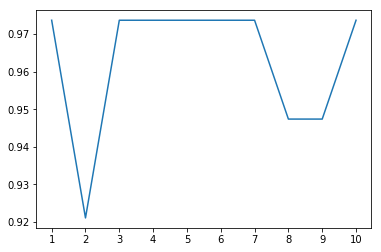

In [65]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))

plt.plot(a_index,a)
plt.xticks(x)

### In the above models we used all the features of iris. Now we will seperate petals and sepals

In [67]:
petal=iris[['PetalLengthCm', 'PetalWidthCm', 'Species']]
sepal=iris[['SepalLengthCm', 'SepalWidthCm', 'Species']]

In [68]:
train_p, test_p = train_test_split(petal,test_size=0.3, random_state=0)
train_x_p = train_p[['PetalLengthCm', 'PetalWidthCm']]
train_y_p = train_p.Species
test_x_p = test_p[['PetalLengthCm', 'PetalWidthCm']]
test_y_p = test_p.Species

train_s, test_s = train_test_split(sepal, test_size=0.3, random_state=0)
train_x_s = train_s[['SepalLengthCm', 'SepalWidthCm']]
train_y_s = train_s.Species
test_x_s = test_s[['SepalLengthCm', 'SepalWidthCm']]
test_y_s = test_s.Species

### SVM

In [70]:
model=svm.SVC()
model.fit(train_x_p, train_y_p)
prediction=model.predict(test_x_p)
print('using petals:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s, train_y_s)
prediction=model.predict(test_x_s)
print('using sepals:',metrics.accuracy_score(prediction,test_y_s))

using petals: 0.9777777777777777
using sepals: 0.8


### Logistic Regression

In [72]:
model=LogisticRegression()
model.fit(train_x_p, train_y_p)
prediction=model.predict(test_x_p)
print('using petals:',metrics.accuracy_score(prediction, test_y_p))

model=LogisticRegression()
model.fit(train_x_s, train_y_s)
prediction=model.predict(test_x_s)
print('using sepals:',metrics.accuracy_score(prediction, test_y_s))

using petals: 0.6888888888888889
using sepals: 0.6444444444444445


### Using Decision Tree

In [74]:
model = DecisionTreeClassifier()
model.fit(train_x_p, train_y_p)
prediction=model.predict(test_x_p)
print('using petals',metrics.accuracy_score(prediction, test_y_p))

model = DecisionTreeClassifier()
model.fit(train_x_s, train_y_s)
prediction = model.predict(test_x_s)
print('using sepals:',metrics.accuracy_score(prediction,test_y_s))

using petals 0.9555555555555556
using sepals: 0.6666666666666666


### Using K-Nerest Neighbors

In [77]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_x_p, train_y_p)
prediction=model.predict(test_x_p)
print('using petals',metrics.accuracy_score(prediction,test_y_p))

model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print('using sepals:',metrics.accuracy_score(prediction,test_y_s))

using petals 0.9777777777777777
using sepals: 0.7333333333333333


Thus we have worked upon a very basic iris dataset and successfully tried to determine the species to which it belongs using machine learning classification algorithms